In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
period_range = [1, 6, 12, 24]
step_range = [2**-p for p in range(13)]
print(step_range)

[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625]


In [12]:
price={}
for p in period_range:   
    price[p] ={}
    for s in step_range:
        price[p][s]=pd.read_csv(f'./Outputs/period_{p}_timestep_{s}.csv',usecols=['TIME','Electricity Tariff'],squeeze=True,index_col=0,dtype='float64')

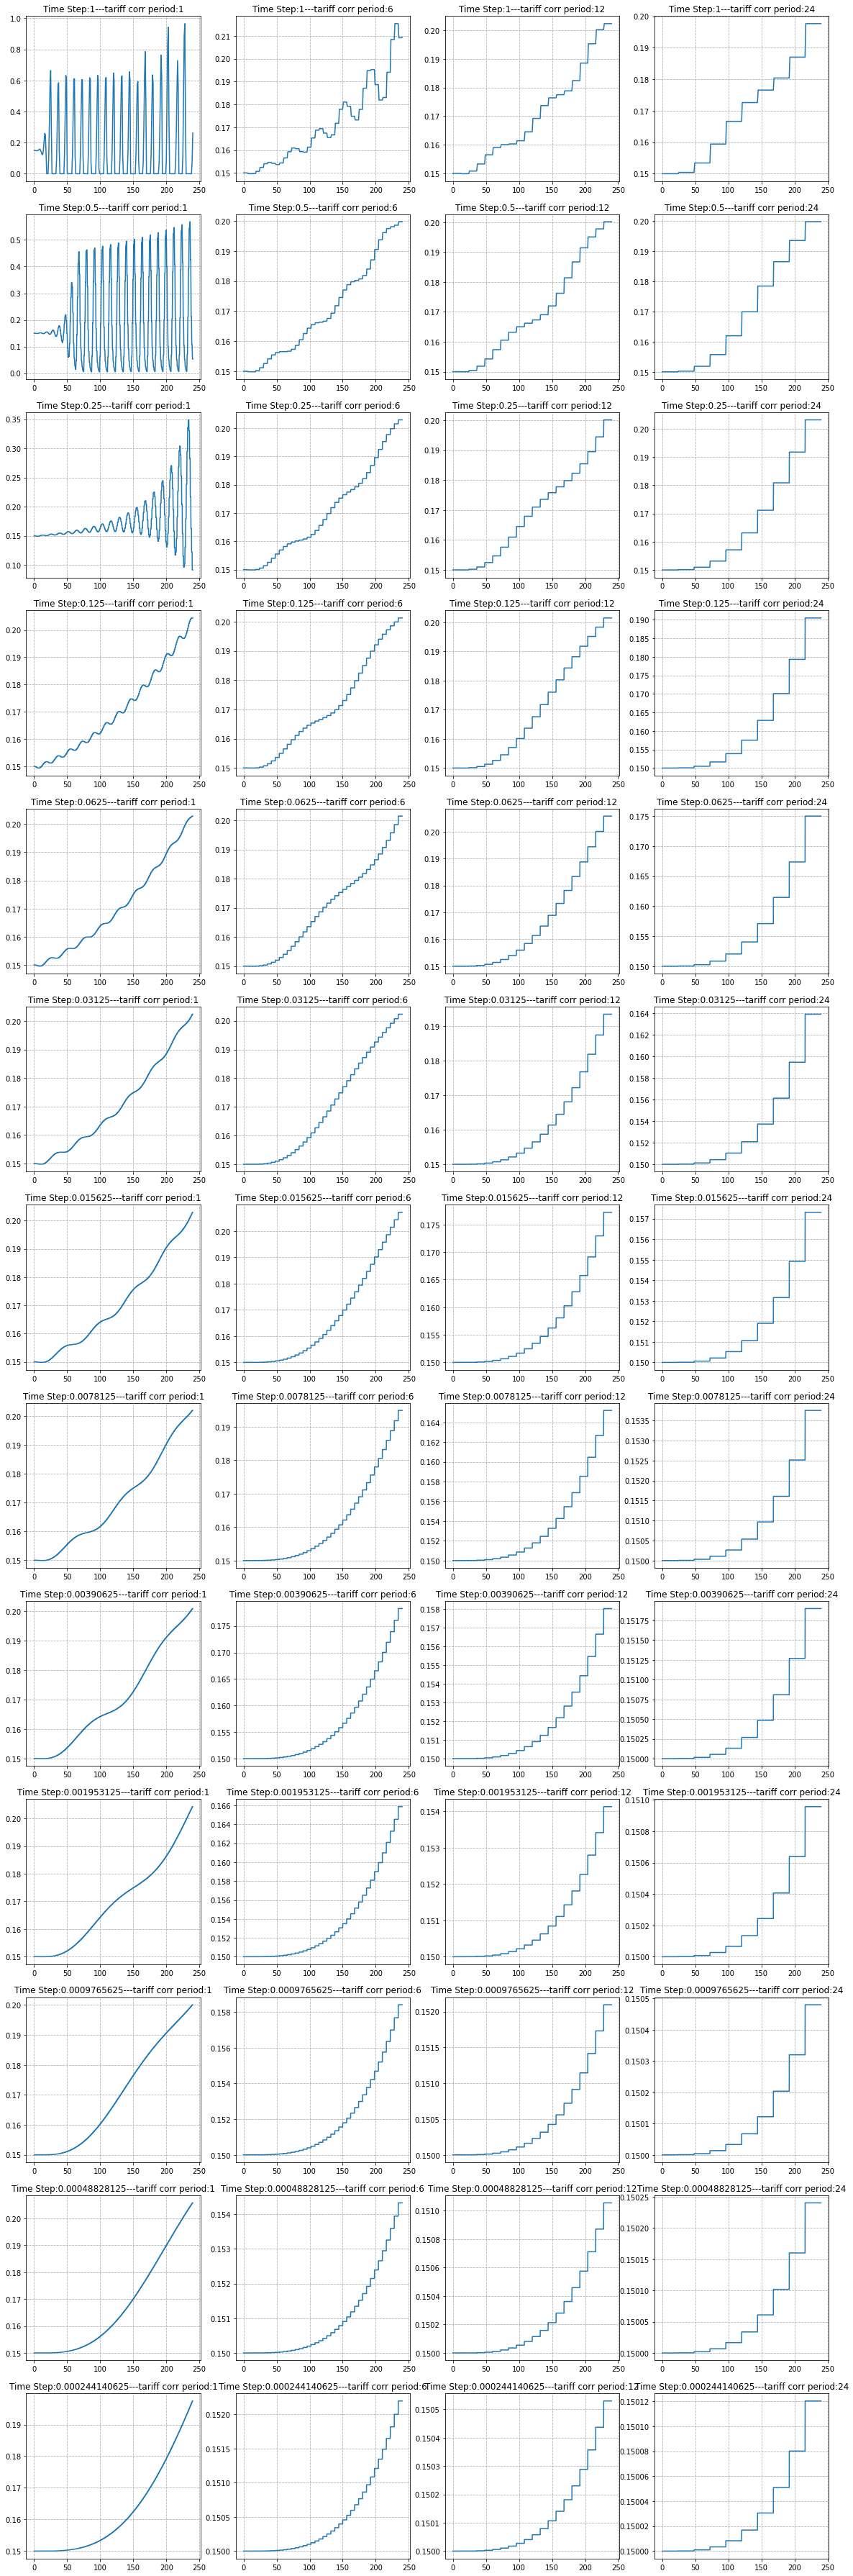

In [15]:
fig,ax = plt.subplots(len(step_range),len(period_range))
fig.set_size_inches(len(period_range)*5,len(step_range)*5)
for i,p in enumerate(period_range):
    for j,s in enumerate(step_range):
        ax[j,i].plot(price[p][s])
        ax[j,i].grid(True,linestyle='--')
        ax[j,i].title.set_text(f'Time Step:{s}---tariff corr period:{p}')

In [5]:
[(p,price[p].max()) for p in price]

[(1, 0.2023171847007584),
 (0.5, 0.2001535819063077),
 (0.25, 0.2001369666619578),
 (0.125, 0.2014750447971341),
 (0.0625, 0.205796437933473),
 (0.03125, 0.1934936640914192),
 (0.015625, 0.1772108944060481),
 (0.0078125, 0.1652105684072755),
 (0.00390625, 0.1580392422134827),
 (0.001953125, 0.1541323811909249),
 (0.0009765625, 0.1520949272513369),
 (0.00048828125, 0.1510547167510148),
 (0.000244140625, 0.1505291803136343)]

## Differentiating the price time series

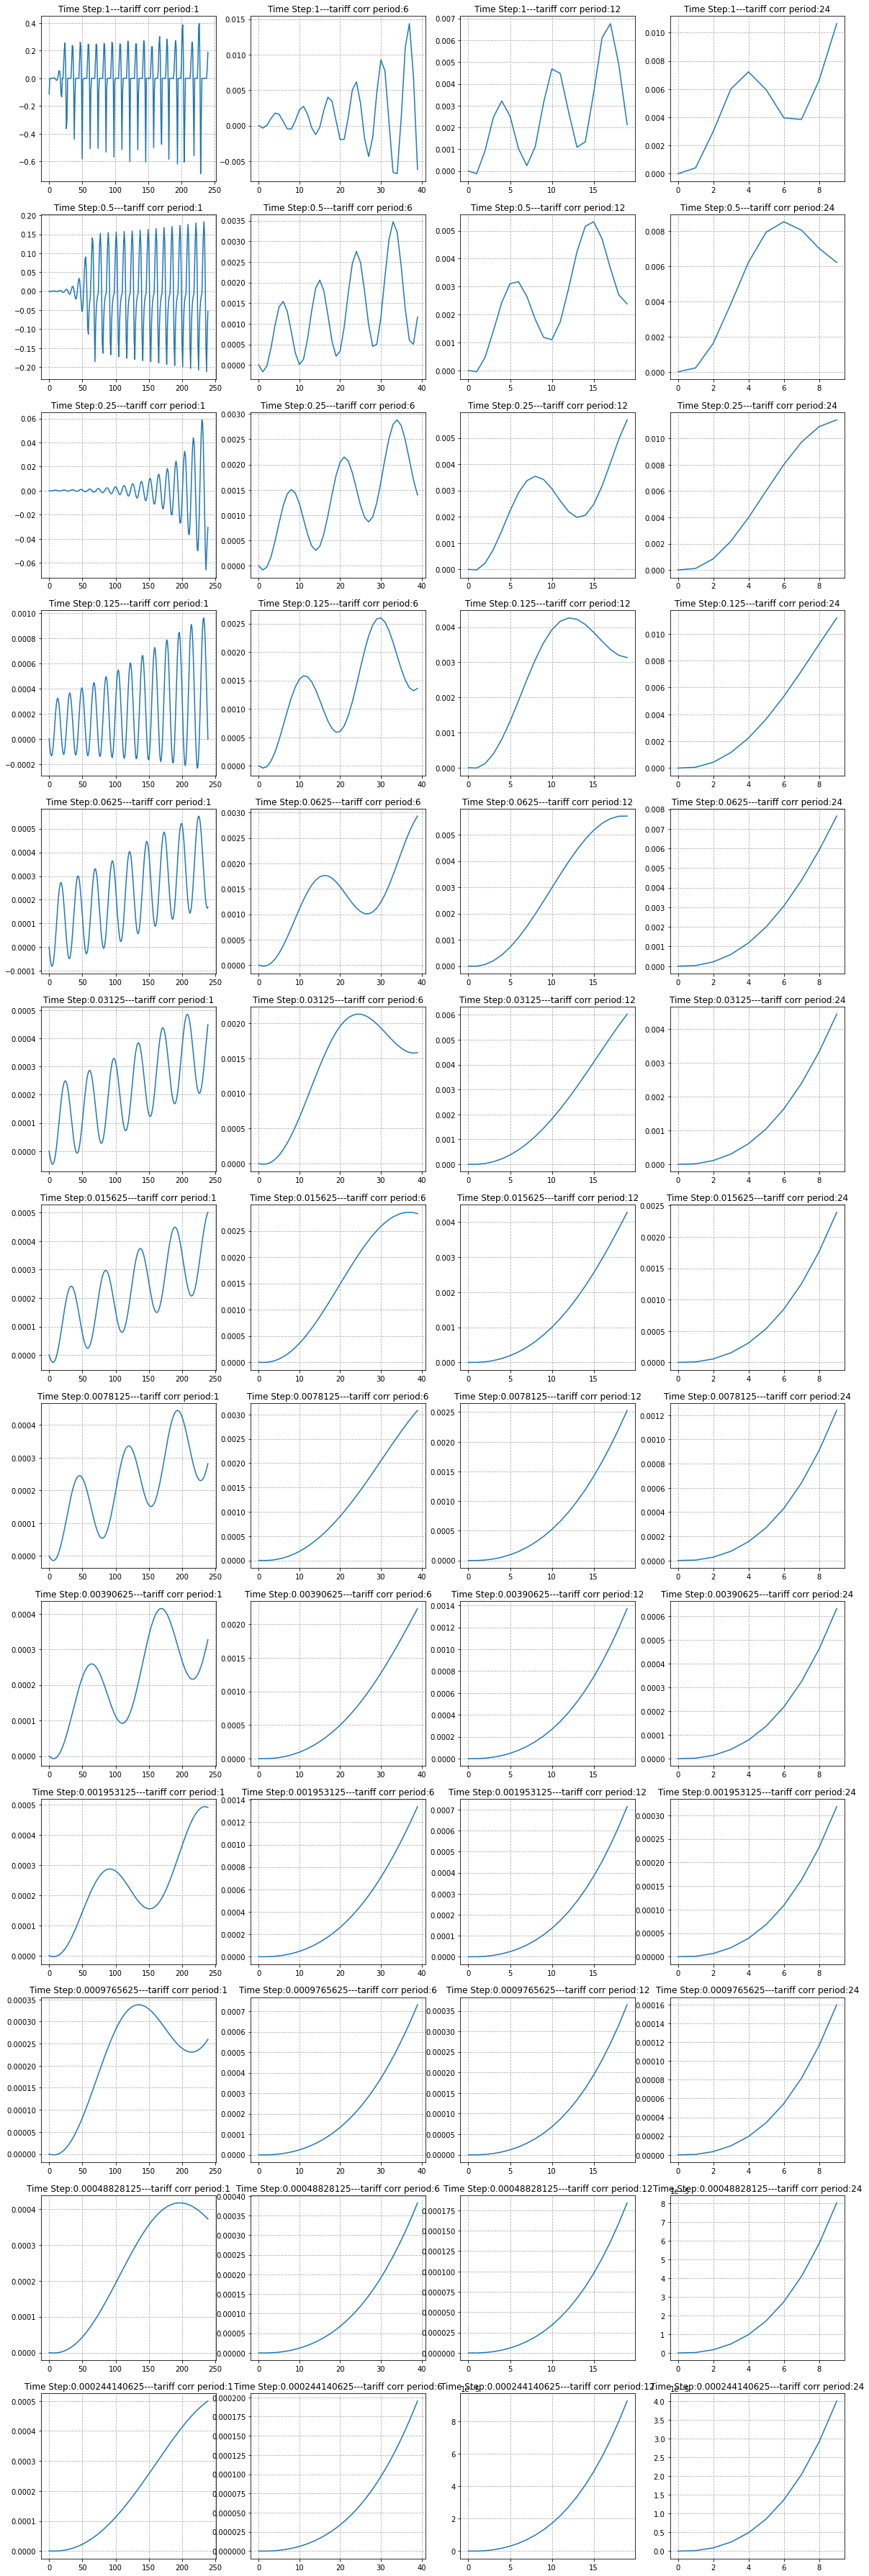

In [17]:
fig,ax = plt.subplots(len(step_range),len(period_range))
fig.set_size_inches(len(period_range)*5,len(step_range)*5)
for i,p in enumerate(period_range):
    for j,s in enumerate(step_range):
        y=price[p][s].to_numpy()
        dif=[]
        for k,sex in enumerate(y):
            if (k-1)%(p/s)==0:
                dif.append(y[k]-y[k-1])
        ax[j,i].plot(dif)
        ax[j,i].grid(True,linestyle='--')
        ax[j,i].title.set_text(f'Time Step:{s}---tariff corr period:{p}')

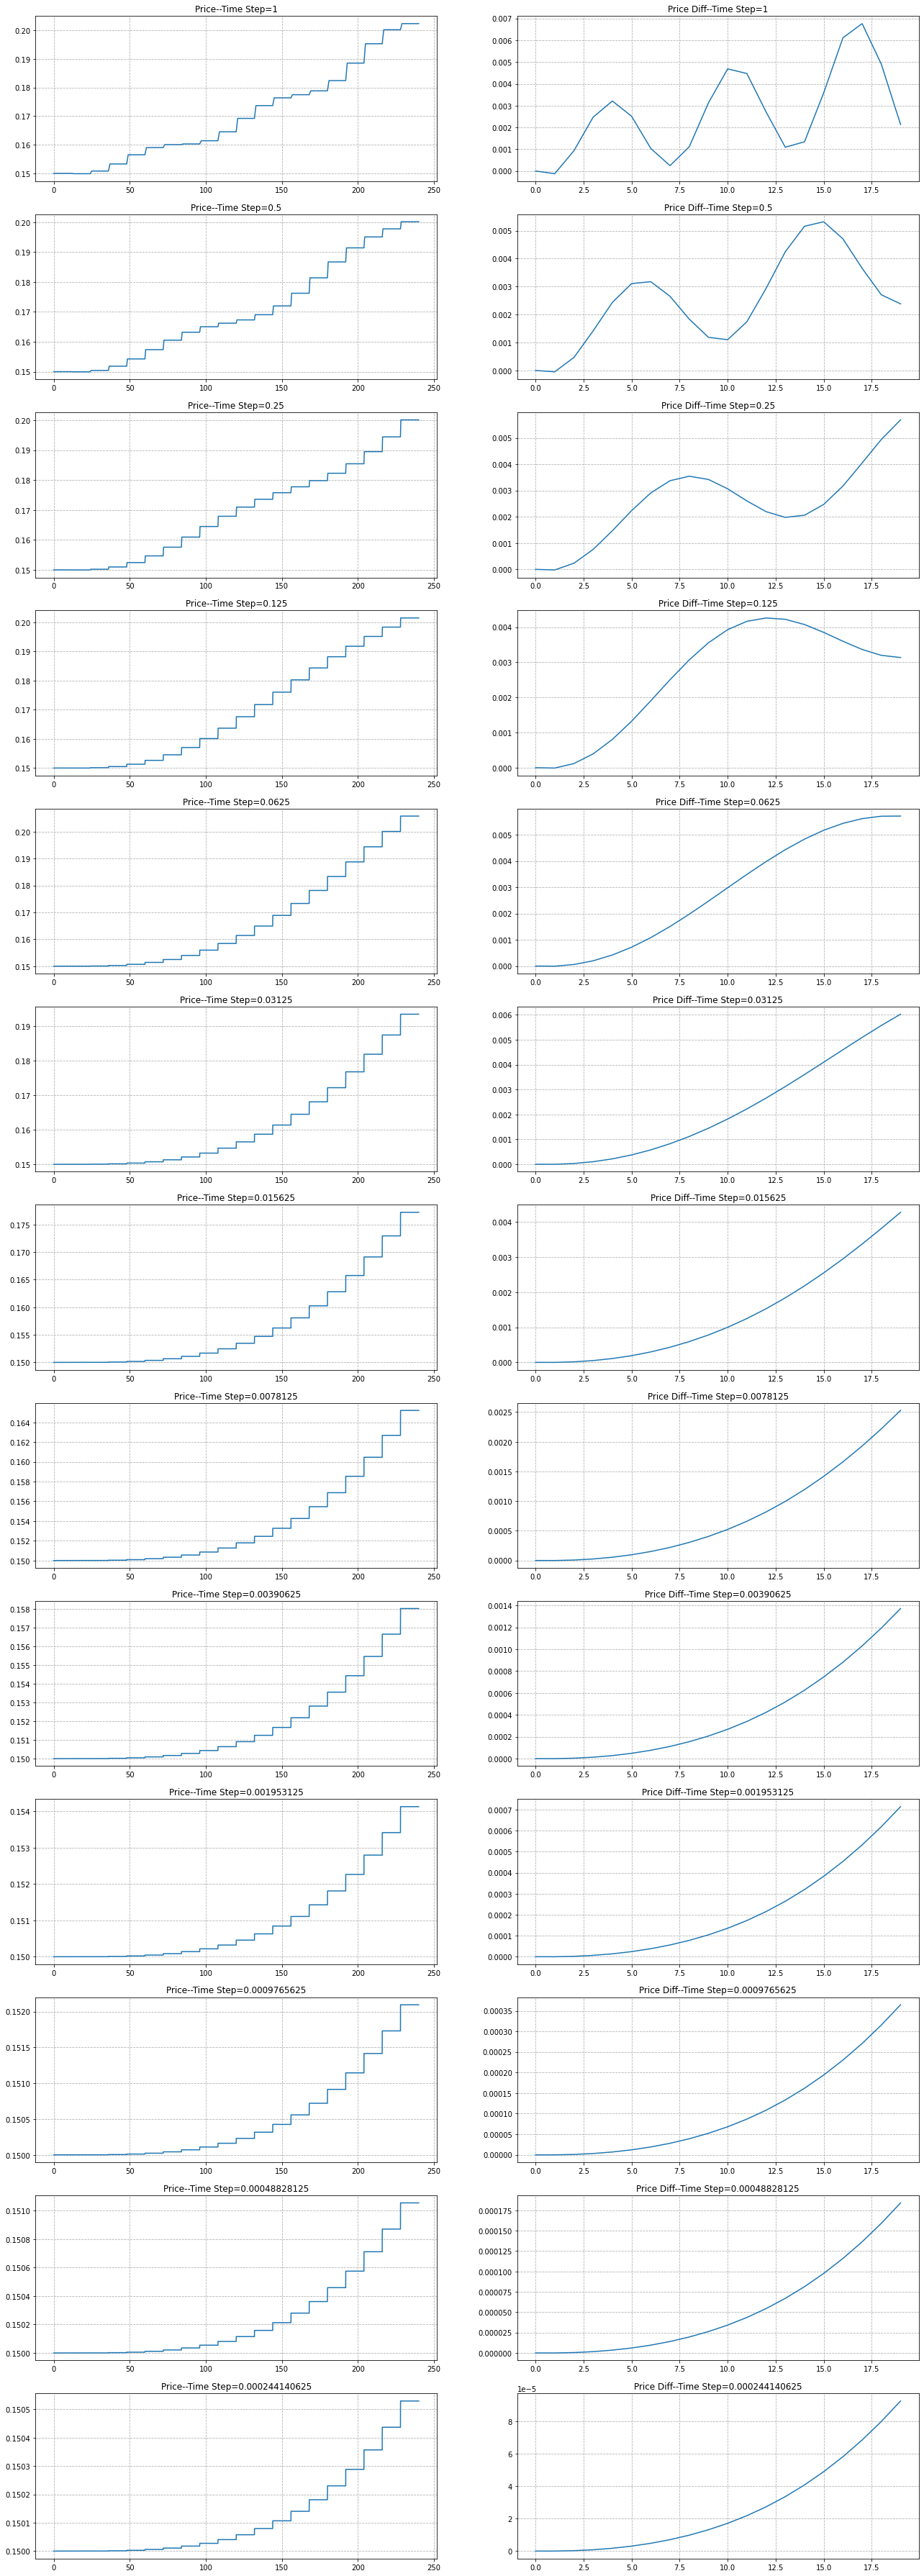

In [6]:
fig,ax = plt.subplots(len(step_range),2)
fig.set_size_inches(22,len(step_range)*5)
price_dif={}
for i,s in enumerate(step_range):
    ax[i,0].plot(price[s])
    ax[i,0].grid(True,linestyle='--')
    ax[i,0].title.set_text(f'Price--Time Step={s}')
    y=price[s].to_numpy()
    dif=[]
    for j,p in enumerate(y):
        if (j-1)%(period/s)==0:
            dif.append(y[j]-y[j-1])
    price_dif[s]=dif
    ax[i,1].plot(dif)
    ax[i,1].grid(True,linestyle='--')
    ax[i,1].title.set_text(f'Price Diff--Time Step={s}')



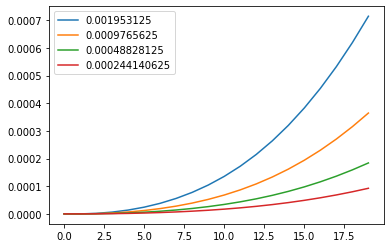

In [7]:
for s in step_range[9:]:
    plt.plot(price_dif[s], label=str(s))
plt.legend()